#第7章: 単語ベクトル

コマンド上でDLしようとしたら、英語でアクセス多すぎてDLできないよ、的なエラーメッセージが出てきてできんかった。故にドライブに保存したファイルを読み込む方針で

In [ ]:
cd /content/drive/MyDrive/field/knock60

/content/drive/MyDrive/field/knock60


In [ ]:
!ls

GoogleNews-vectors-negative300.bin  questions-words-ans.txt  wordsim353.zip
knock60.ipynb			    questions-words.txt


ちなみにダメだったのは次のコード

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
output = 'data.bin'

gdown.download(url, output, quiet=False)

Access denied with the following error:



 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM 



##60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）を[ダウンロード](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)し，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
!gzip -d GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [ ]:
!head -n10 GoogleNews-vectors-negative300.bin

3000000 300
�  G:  �  ��  :  �  պ  �  ��  ��  ��  �8  ��  �  �:  �9  ��  ��  �9  ��  �  R:  �:  [�  ��  p:  	:  ��  �:  Ϻ  ��  :  �:  ��  .�  �  ��  �:  "8  19  ��  �:  %:  �9  ��  �9  �:  ��  ��  y:  ~8  47  /�  �:  5:  i8  b�  ��  �:  S�  f�  o9  й  a�  �9  к  �9  ��  6  ǹ  9:  к  �:  �:  �  �:  m:  ��  �:  8�  �9  ��  5:  ]�  �:  ��  0�  �:  ��  �:  ��  3�  N�  �9  �9  '�  9  ��  �:  c5  ں  ��  %:  ��  ��  �:  �  ��  _�  ��  ��  ��  �:  �:  ��  �  �:  ��  ��  n8  ��  �9  κ  ��  �:  �  ɺ  ɺ  :  �:  �9  ��  99  �  7�  b�  ��  ��  R:  2:  �9  ��  �:  v9  ��  e�  C�  �:  ~8  ��  �:  #�  4  �:  ��  ˺  �:  ��  P�  �:  �:  =�  q:  �:  J:  ٺ  J:  �:  ��   :  -:  �:  �:  ��  ƺ  �:  �:  �:  �  �  �9  ��  :  �:  9�  $:  ��  G�  �8  �  V�  Y�  �  H:  �9  ��  �:  �:  ��  �8  ̺  f9  h�  o�  ú  �:  ]�  ܹ  �9  ��  9  �  J9  ��  �:  к  :  ��  }:  ��  �:  �:  ��  �:  �  �9  �:  Y�  m:  /:  �:  e�  Ź  ��  ��  �:  ��  ��  �:  &�  �:  ��  �  ˺  �:  �  X�  �:  �:  :  ͺ  �  ��in

In [ ]:


model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
# 次元数の取得
dimension = model.vector_size

print(dimension)

300


In [ ]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

##61.単語の類似度Permalink
“United States”と”U.S.”のコサイン類似度を計算せよ．


In [ ]:
model.similarity('United_States', 'U.S.')

0.73107743

##62. 類似度の高い単語10件Permalink
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

##63. 加法構成性によるアナロジーPermalink
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
vec = model['Spain'] - model['madrid'] + model['Athens'] 

model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

In [ ]:
model.most_similar(vec, topn=10)

[('Athens', 0.6826056838035583),
 ('Greece', 0.4856836199760437),
 ('Athens_Greece', 0.46644291281700134),
 ('Spain', 0.4448360204696655),
 ('Rome', 0.41419845819473267),
 ('Organising_Committee_ATHOC', 0.41101542115211487),
 ('prosecutor_Costas_Simitzoglou', 0.4097808599472046),
 ('bronze_medalist_Alicia_Molik', 0.3909006416797638),
 ('Greek', 0.39005470275878906),
 ('silver_medalist_Mardy_Fish', 0.38434845209121704)]

##64. アナロジーデータでの実験Permalink
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2023-06-11 08:36:35--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.31.128, 2607:f8b0:4004:c1d::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.31.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.3’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.01s   

2023-06-11 08:36:35 (45.6 MB/s) - ‘questions-words.txt.3’ saved [603955/603955]



In [ ]:
from tqdm import tqdm

In [ ]:
!head -n10 questions-words.txt 

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [ ]:

with open('questions-words.txt', 'r') as input, open('questions-words-ans.txt', 'w') as output:
  for line in  tqdm(input):  
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, coss = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      output.write(' '.join([category] + line + [word, str(coss) + '\n']))

12783it [1:30:02,  1.81it/s]

結局間に合わなくて草

2022のリポジトリから結果を持ってくる


In [ ]:
!head -n3 questions-words-ans.txt

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.635187029838562
Athens Greece Bangkok Thailand Thailand 0.7137669920921326


##65. アナロジータスクでの正解率Permalink
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

文法アナロジーの項目は": gram%d-xxxxx"という形式になってる

In [53]:
from tqdm import tqdm
seacr,syacr, seaal,syaal = 0,0,0,0
flag = 0
with open("questions-words-ans.txt", "r") as f:
    file_lines = f.readlines()  # ファイルの全ての行を読み込む->list
    total_lines = len(file_lines)  # ファイルの行数を取得->num
    for line in tqdm(file_lines, total=total_lines):
      line = line.split()
      if line[0] ==":":
        if "gram" in line[1]:
          flag = 1
        continue

      if flag == 0:
        seaal += 1
        if line[3] == line[4]:
          seacr += 1
      else:
        syaal += 1
        if line[3] == line[4]:
          syacr += 1
print("\n")
print(f'意味的アナロジー: {seacr/seaal:f}')
print(f'文法的アナロジー: {syacr/syaal:f}') 

100%|██████████| 19558/19558 [00:00<00:00, 1294781.83it/s]



意味的アナロジー: 0.730860
文法的アナロジー: 0.740047


##66. WordSimilarity-353での評価Permalink
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [41]:
!ls

GoogleNews-vectors-negative300.bin  questions-words-ans.txt  wordsim353.zip
knock60.ipynb			    questions-words.txt


In [44]:
!unzip wordsim353.zip

Archive:  wordsim353.zip
replace combined.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace set1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace set2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace combined.tab? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace set1.tab? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace set2.tab? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace instructions.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [46]:
!ls

combined.csv			    knock60.ipynb	     set1.tab
combined.tab			    questions-words-ans.txt  set2.csv
GoogleNews-vectors-negative300.bin  questions-words.txt      set2.tab
instructions.txt		    set1.csv		     wordsim353.zip


In [48]:
!head -n10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [51]:
ws = []
with open('./combined.csv', 'r') as f:
  next(f) #一つスキップ
  for line in f:  
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    ws.append(line)
for i in range(5):
  print(ws[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [59]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(ws).T[2]
wv = np.array(ws).T[3]
correlation, p = spearmanr(human, wv)

print(f'スピアマン相関係数: {correlation:f}')
print(f"p値: {p}")

スピアマン相関係数: 0.684956
p値: 3.3287848950139166e-50


##67. k-meansクラスタリングPermalink
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [61]:
!head -n10 country.csv

name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
Afghanistan,AF,AFG,004,ISO 3166-2:AF,Asia,Southern Asia,"",142,034,""
Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,"",150,154,""
Albania,AL,ALB,008,ISO 3166-2:AL,Europe,Southern Europe,"",150,039,""
Algeria,DZ,DZA,012,ISO 3166-2:DZ,Africa,Northern Africa,"",002,015,""
American Samoa,AS,ASM,016,ISO 3166-2:AS,Oceania,Polynesia,"",009,061,""
Andorra,AD,AND,020,ISO 3166-2:AD,Europe,Southern Europe,"",150,039,""
Angola,AO,AGO,024,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,002,202,017
Anguilla,AI,AIA,660,ISO 3166-2:AI,Americas,Latin America and the Caribbean,Caribbean,019,419,029
Antarctica,AQ,ATA,010,ISO 3166-2:AQ,"","","","","",""


In [67]:
country_list = []
with open("country.csv","r") as f:
  next(f)
  for line in f:
    line = [s.strip() for s in line.split(',')]
    country_list.append(line[0])
print(country_list)

['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', '"Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', '"Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fa

In [74]:
country_vec = []
invalid_c_name = []
for i in range(len(country_list)):
  try:
    country_vec.append(model[country_list[i]])
  except KeyError:
    invalid_c_name.append(country_list[i])
print(invalid_c_name)

['Åland Islands', 'American Samoa', 'Antigua and Barbuda', 'Bolivia (Plurinational State of)', '"Bonaire', 'Bosnia and Herzegovina', 'Bouvet Island', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Burkina Faso', 'Cabo Verde', 'Cayman Islands', 'Central African Republic', 'Christmas Island', 'Cocos (Keeling) Islands', '"Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Dominican Republic', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Guinea-Bissau', 'Heard Island and McDonald Islands', 'Holy See', 'Hong Kong', 'Iran (Islamic Republic of)', 'Isle of Man', "Korea (Democratic People's Republic of)", '"Korea', "Lao People's Democratic Republic", 'Marshall Islands', 'Micronesia (Federated States of)', '"Moldova', 'New Caledonia', 'New Zealand', 'Norfolk Island', 'North Macedonia', 'Northern Mariana Islands', '"Palestine', 'Papua New Guinea', 'Puerto Rico', 'R

In [78]:
country_list= [x for x in country_list if x not in invalid_c_name] 

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(country_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([country_list[k] for k in cluster]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0
Albania, Andorra, Argentina, Armenia, Austria, Azerbaijan, Belarus, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Greenland, Hungary, Iceland, Ireland, Italy, Kazakhstan, Latvia, Liechtenstein, Lithuania, Luxembourg, Malta, Monaco, Montenegro, Netherlands, Norway, Paraguay, Poland, Portugal, Romania, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, Ukraine, Uruguay
cluster 1
Afghanistan, Australia, Bahrain, Bangladesh, Bhutan, Cambodia, China, Egypt, India, Indonesia, Iraq, Israel, Japan, Jordan, Kuwait, Kyrgyzstan, Lebanon, Macao, Malaysia, Mongolia, Myanmar, Nepal, Oman, Pakistan, Philippines, Qatar, Singapore, Tajikistan, Thailand, Turkmenistan, Uzbekistan, Yemen
cluster 2
Algeria, Angola, Benin, Botswana, Burundi, Cameroon, Chad, Congo, Djibouti, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Morocco, Mozambique, Namibia, Niger

##68. Ward法によるクラスタリングPermalink
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

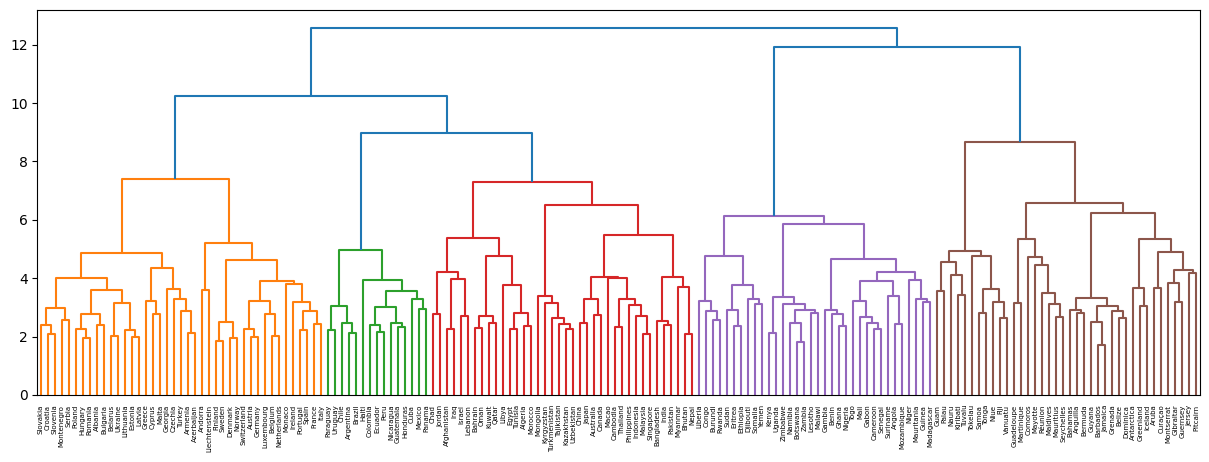

In [82]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(country_vec, method='ward')
dendrogram(Z, labels=country_list)
plt.show()

##69. t-SNEによる可視化Permalink
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [83]:
!pip install bhtsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp310-cp310-linux_x86_64.whl size=268785 sha256=ab1620d19c1340c9db0a497fe092bbe110c07ed1a5ed77298362f75706b4d1d7
  Stored in directory: /root/.cache/pip/wheels/24/4f/44/5397f84b9a0b2bdc20824d60f71a9349883785afda348b27db
Successfully built bhtsne


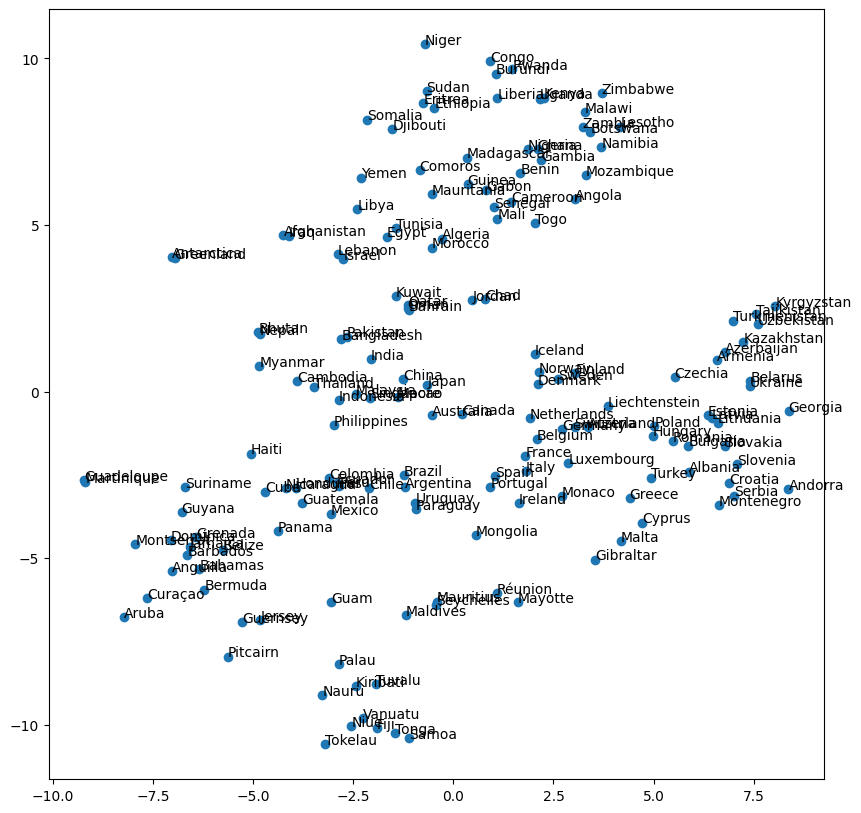

In [84]:
import bhtsne

embedded = bhtsne.tsne(np.array(country_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, country_list):
    plt.annotate(name, (x, y))
plt.show()